In [108]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

# EDA

In [109]:
df=sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [110]:
df.shape

(398, 9)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [112]:
df.name.nunique()

305

In [113]:
# kullanmayacagimiz categorik name sutunu drop yapiliyor
df.drop(["name"], axis=1, inplace=True)

In [114]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [115]:
# Null degerler drop yapilir.
df.dropna(inplace=True)

In [116]:
# herhangi null varmi tekrar kontrol edilir
df.isnull().sum().any()

False

In [117]:
df.shape

(392, 8)

In [118]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa


> 'model_year' bu haliyle isimize yaramaz, onu 'age' halinede donusturup yeni sutun yapariz

In [119]:
from datetime import datetime

In [120]:
today=datetime.today()
this_year=today.year
this_year

2020

In [121]:
df["age"]=this_year - (1900 + df.model_year)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,age
0,18.0,8,307.0,130.0,3504,12.0,70,usa,50
1,15.0,8,350.0,165.0,3693,11.5,70,usa,50
2,18.0,8,318.0,150.0,3436,11.0,70,usa,50
3,16.0,8,304.0,150.0,3433,12.0,70,usa,50
4,17.0,8,302.0,140.0,3449,10.5,70,usa,50


In [122]:
df.drop(["model_year"], axis=1, inplace=True)

In [123]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,age
0,18.0,8,307.0,130.0,3504,12.0,usa,50
1,15.0,8,350.0,165.0,3693,11.5,usa,50
2,18.0,8,318.0,150.0,3436,11.0,usa,50
3,16.0,8,304.0,150.0,3433,12.0,usa,50
4,17.0,8,302.0,140.0,3449,10.5,usa,50


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   origin        392 non-null    object 
 7   age           392 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 27.6+ KB


> modele yalniz float ve integer degerleri sokabiliriz, dolayisiyla 'origin' sutununu numerik degere donusturmeliyiz

In [125]:
df2=df.copy()
df2=pd.get_dummies(df2)
df2.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,50,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,50,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,50,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,50,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,50,0,0,1


> [origin_europe, origin_japan, origin_usa] icinden birini silmezsek dummy trap olur. 1 tanesi gereksizdir.

> evaluation metriclerinin farkini gormek icin df2 tanimladik, df ve df2 farkini gorecegiz. df2 de dummy trap olur.

In [126]:
df=pd.get_dummies(df, drop_first=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,50,0,1
1,15.0,8,350.0,165.0,3693,11.5,50,0,1
2,18.0,8,318.0,150.0,3436,11.0,50,0,1
3,16.0,8,304.0,150.0,3433,12.0,50,0,1
4,17.0,8,302.0,140.0,3449,10.5,50,0,1


# Training a Linear Regression Model

In [127]:
X=df.drop(["mpg"], axis=1)
y=df["mpg"]

In [128]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,age,origin_japan,origin_usa
0,8,307.0,130.0,3504,12.0,50,0,1
1,8,350.0,165.0,3693,11.5,50,0,1
2,8,318.0,150.0,3436,11.0,50,0,1
3,8,304.0,150.0,3433,12.0,50,0,1
4,8,302.0,140.0,3449,10.5,50,0,1


In [129]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.2, random_state = 101)

In [132]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Training Model

In [133]:
from sklearn.linear_model import LinearRegression

In [134]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [135]:
# r2 score: veriyi yüzdelik oranda temsil etme kabiliyeti
print(model.score(X,y)*100)

82.28608996583172


# Model Evaluate

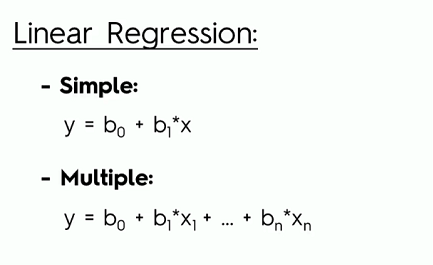

In [136]:
# bo =interception
model.intercept_

79.15570116867286

In [137]:
# Coefficients= b1,b2,...,bn
model.coef_

array([-0.45714418,  0.02787133, -0.0069109 , -0.0074939 ,  0.17585516,
       -0.82860346, -0.33688903, -2.86133944])

In [138]:
# coefficientlari daha iyi gostermek icin DF yapiyoruz
coeff_df = pd.DataFrame(model.coef_, index=X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
cylinders,-0.457144
displacement,0.027871
horsepower,-0.006911
weight,-0.007494
acceleration,0.175855
age,-0.828603
origin_japan,-0.336889
origin_usa,-2.861339


# Prediction

In [139]:
y_pred = model.predict(X_test)
y_pred

array([10.54432885, 20.19839926, 21.80628505, 31.62431822, 16.85569191,
       20.43148709, 28.99628201, 19.4112871 , 23.56360922, 25.36484533,
       30.18432236, 29.8773582 , 29.43347949, 28.7704783 , 29.09655783,
       23.66749955, 12.78192193, 23.73151779,  9.96117883, 17.33381583,
       27.65903858, 24.97548445, 21.12634019, 15.82421638, 31.55048309,
       30.92465774, 26.2778583 , 10.93158295, 25.35939774, 11.58502944,
       34.47007354, 33.33024202, 27.77072388, 28.2398768 , 29.41743542,
       25.53418932, 28.57987256, 16.38002814,  5.56638013, 24.58141129,
       28.97929376, 23.60644509, 14.89178086, 15.81733259, 11.9739925 ,
       25.47997432, 28.43270727, 16.57578801, 14.8461753 , 20.42157574,
       25.65274887, 14.65666967, 36.10793833, 34.40657268, 23.5638784 ,
       22.21286103,  9.19383054, 25.72800023, 21.38923994, 29.72794452,
       29.1748569 , 12.2742943 , 28.13629364, 23.61274309, 20.86456761,
       14.95992634, 14.80522577, 22.49569497, 24.24331543, 18.47

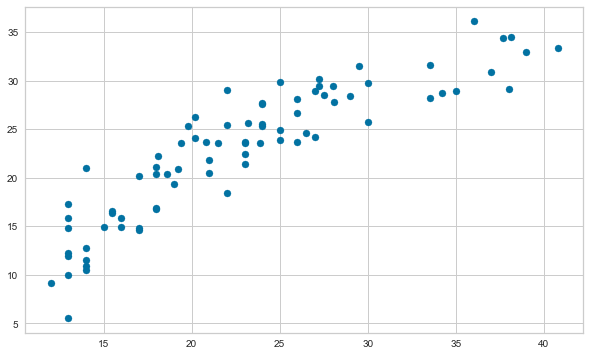

In [140]:
fig=plt.subplots(figsize=(10,6))
plt.scatter(y_test,y_pred);

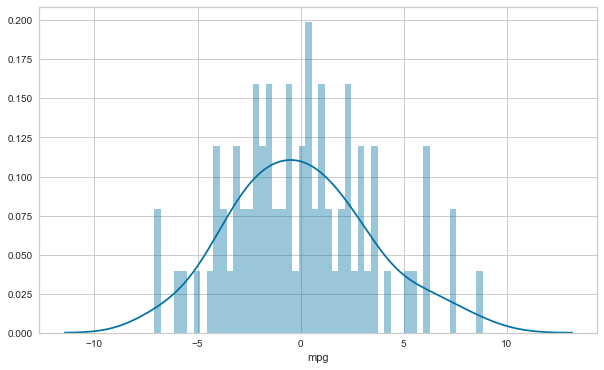

In [141]:
fig=plt.subplots(figsize=(10,6))
sns.distplot((y_test-y_pred), bins=50);

In [142]:
y_pred_train=model.predict(X_train)

# Evaluation Metrics

In [159]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [143]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    r2score = r2_score(actual, pred)
    print(f"R2 Score: {r2score}",
          f"Mean Absolute Error(MAE): {mae}",
          f"Mean Square Error(MSE): {mse}",
          f"Root Mean Square Error(RMSE): {rmse}",sep="\n")

In [144]:
eval_metrics(y_test, y_pred)

R2 Score: 0.7921284213932539
Mean Absolute Error(MAE): 2.677653847546168
Mean Square Error(MSE): 11.329545943381236
Root Mean Square Error(RMSE): 3.3659390878893274


In [145]:
eval_metrics(y_train, y_pred_train)

R2 Score: 0.8293548188498566
Mean Absolute Error(MAE): 2.5072836388383815
Mean Square Error(MSE): 10.620578098034022
Root Mean Square Error(RMSE): 3.2589228432158412


# Comparison of Actual and Predictions

In [146]:
my_dict={"Actual":y_test, "Predictions":y_pred}
compare=pd.DataFrame(my_dict)
compare.sample(10)

,Actual,Predictions
140,14.0,12.781922
291,19.2,20.864568
283,20.2,24.155903
200,18.0,20.431487
57,24.0,25.364845
280,21.5,23.612743
365,20.2,26.277858
214,13.0,17.333816
257,19.4,23.563609
180,25.0,24.975484


# Distribution of Residuals

In [147]:
# pip install yellowbrick

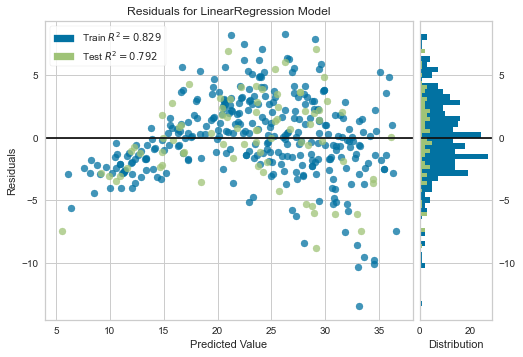

In [148]:
from yellowbrick.regressor import ResidualsPlot

# Instantiate the linear model and visualizer
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

# Residuals: Actual ve Prediction arasindaki hata payi

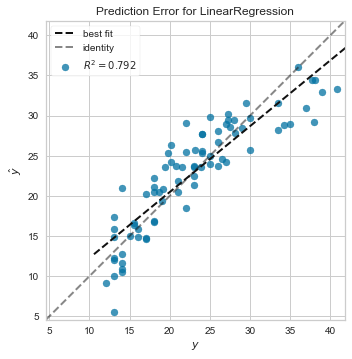

In [149]:
from yellowbrick.regressor import PredictionError

# Instantiate the linear model and visualizer
visualizer = PredictionError(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure